#### <b>Note:</b> If you read this file directly from GitLab, you may see redundant backslashes. You should open this file in JupyterLab to view the expressions properly.

# Regex

## Reading

- New text: "Principles and Techniques of Data Science", by Sam Lau, Joey Gonzalez, and Deb Nolan
- Used for Berkeley's DS100 Course.
- Read Chapter 13: https://www.textbook.ds100.org/ch/13/text_regex.html


## Regular expressions aka Regex

- Regex: a small language for describing patterns to search for regex patterns are used in many different programming languages (like how many different languages might use SQL queries)
- https://blog.teamtreehouse.com/regular-expressions-10-languages
- Inventor: Stephen Cole Kleene (UW-Madison mathematician) --- https://en.wikipedia.org/wiki/Stephen_Cole_Kleene

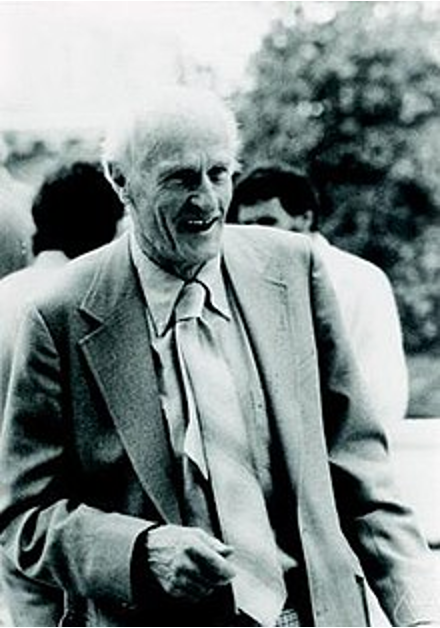

### Review of `str.find(<search string>)` method

- `str.find(<search string>)` method returns the index of the first matching occurrence of the search string 
- `str.find` is VERY limited -- what if we want to:
    - find all occurrences of "320"
    - find any 3-digit numbers?
    - find any numbers at all?
    - find a number before the word "projects"?
    - substitute a number for something else?

Regexes can do all these things!

In [1]:
msg = "In CS 320,\tthere are 28 lectures, 11 quizzes, 3 exams,\t6 projects, and 1000 things to learn. CS 320 is awesome!"

# does the string contain "320"?
has_320 = msg.find("320") >= 0
print(has_320, msg.find("320"))

True 6


In [2]:
# prints tab between A and B
print("A\tB")
# what if we want to literally print \t between A and B?
# we need to use escape sequence (\)
print("A\\tB")

A	B
A\tB


### Raw string

- easier way to tell Python to print content using raw format of the string than remembering to use escape sequence always
- Syntax: `r"<some string>"` ---> add "r" in the front

In [3]:
print(r"A\tB")

A\tB


In [4]:
#import statements
import re
from subprocess import check_output
import pandas as pd

In [5]:
# Example strings
# from DS100 book...
def reg(regex, text):
    """
    Prints the string with the regex match highlighted.
    """
    print(re.sub(f'({regex})', r'\033[1;30;43m\1\033[m', text))
s1 = " ".join(["A DAG is a directed graph without cycles.",
               "A tree is a DAG where every node has one parent (except the root, which has none).",
               "To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯"])
print(s1)

s2 = """1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)
"""
print(s2)

s3 = "In CS 320, there are 11 quizzes, 6 projects, 28 lectures, and 1000 things to learn.  CS 320 is awesome!"
print(s3)

s4 = """In CS 320,  there are 11 quizzes,    6 projects,
28 lectures, and 1000 things to learn.  CS 320 is awesome!"""
print(s4)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯
1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)

In CS 320, there are 11 quizzes, 6 projects, 28 lectures, and 1000 things to learn.  CS 320 is awesome!
In CS 320,  there are 11 quizzes,    6 projects,
28 lectures, and 1000 things to learn.  CS 320 is awesome!


In [6]:
print(s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### Regex: double escaping (use case for raw strings)

- Regex does another level of formatting with special sequences like \t, \n, etc.,

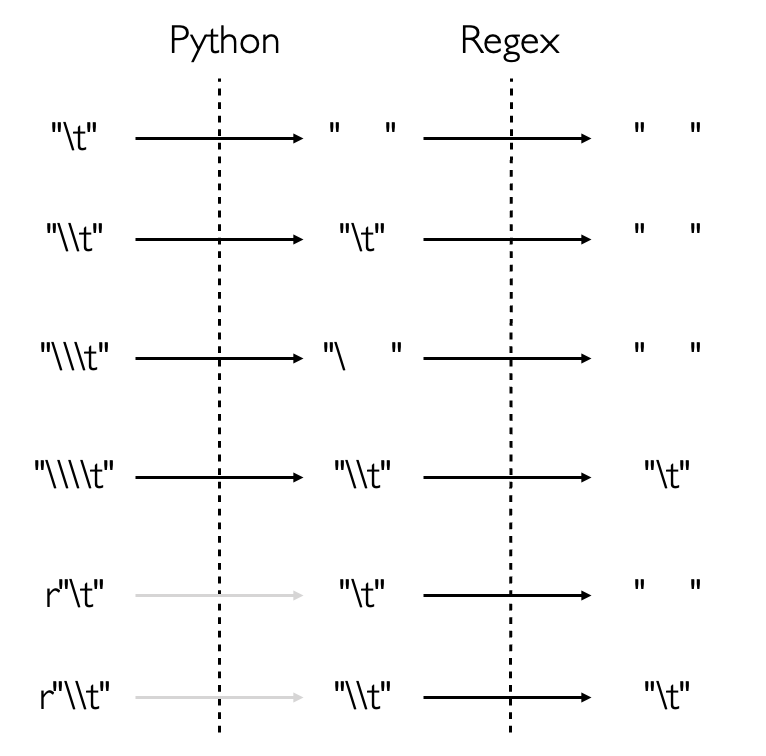

#### Find the right arm "\".

- `reg(<PATTERN>, <STRING>)`

In [7]:
# Python will be unhappy 
# \ works as escape sequence here and it is trying to escape the second ",
# meaning it thinks we are mentioning " literal
# reg("\", s1) # uncomment to see error

In [8]:
# Regex will be unhappy
# reg("\\", s1) # uncomment to see error

In [9]:
# Correct and cumbersome way to do this
reg("\\\\", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [10]:
# Better way would be to use raw string to avoid double escaping
reg(r"\\", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### Regex is case sensitive

#### Find all occurrences of "a".

In [11]:
reg(r"a", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find all occurrences of "A".

In [12]:
reg(r"A", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### Character classes

- Character classes can be mentioned within `[...]`
- `^` means `NOT` of a character class
- `-` enables us to mention range of characters, for example `[A-Z]`
- `|` enables us to perform `OR`

#### Find both "a" and "A".

In [13]:
# Doesn't work - because we are trying to match literally for "aA"
reg("aA", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [14]:
reg("[aA]", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find all the vowels.

In [15]:
reg("[aeiouAEIOU]", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find everything except vowels.

In [16]:
reg("[^aeiouAEIOU]", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find all capital letters.

In [17]:
reg("[A-Z]", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### What if we want to find "A", "Z", and "-"?

In [18]:
# How can we change this to do that?
reg(r"[A\-Z]", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Invalid ranges don't work. For example: `[Z-A]`.

In [19]:
# reg("[Z-A]", s1) # uncomment to see error

#### Find all words related to graphs.

In [20]:
# | means OR
reg(r"tree|directed|undirected|graph|DAG|node|child|parent|root|cycles", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### Metacharacters

- predefined character classes
    - `\d` => digits
    - `\s` => whitespace (space, tab, newline)
    - `\w` => "word" characters (digits, letters, underscores, etc) --- helpful for variable name matches and whole word matches (as it doesn't match whitespace --- `\s`)
    - `.` => wildcard: anything except newline
- capitalized version of character classes mean `NOT`, for example `\D` => everything except digits

#### Find all digits.

In [21]:
# v1
reg(r"[0-9]", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [22]:
# v2 - with metacharacters
reg(r"\d", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find all whitespaces.

In [23]:
reg(r"\s", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find everything except whitespaces.

In [24]:
reg(r"\S", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find anything except newline.

In [25]:
reg(r".", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### What if we want to actually match "."?

In [26]:
#How can we change this to do that?
reg(r"\.", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### REPETITION

- `<character>{<num matches>}` - for example: `w{3}`
- matches cannot overlap

#### Find all "www".

In [27]:
# v1
reg(r"www", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [28]:
# v2 - repitition
reg(r"w{3}", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [29]:
# Lesson: matches cannot overlap
reg(r"w{2}", s1) 

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### Variable length repitition operators

- `*` => 0 or more (greedy: match as many characters as possible)
- `+` => 1 or more (greedy: match as many characters as possible)
- `?` => 0 or 1
- `*?` => 0 or more (non-greedy: match as few characters as possible)
- `+?` => 1 or more (non-greedy: match as few characters as possible)

#### Find everything inside of parentheses.

In [30]:
# this doesn't work
# it captures everything because () have special meaning (coming up)
reg(r"(.*)", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [31]:
# How can we change this to not use special meaning of ()?
# * is greedy: match as many characters as possible
reg(r"\(.*\)", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [32]:
# non-greedy: stop at the first possible spot instead of the last possible spot
reg(r"\(.*?\)", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### Anchor characters
- `^` => start of string
    - `^` is overloaded --- what was the other usage?
- `$` => end of string

#### Find everything in the first sentence.

In [33]:
# doesn't work because remember regex finds all possible matches
# so it matches every single sentence 
# (even though we are doing non-greedy match)
reg(r".*?\.", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [34]:
reg(r"^.*?\.", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find everything in the first two sentences.

In [35]:
reg(r"^(.*?\.){2}", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find last "word" in the sentence.

In [36]:
reg(r"\S+$", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### Case study: find all phone numbers.

In [37]:
print(s2)
# The country code (1) in the front is optional
# The area code (608) is also optional
# Doesn't make sense to match country code without area code though!

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



In [38]:
# Full US phone numbers
reg(r"\d-\d{3}-\d{3}-\d{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



In [39]:
# The country code (1) in the front is optional
reg(r"(\d-)?\d{3}-\d{3}-\d{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



In [40]:
# The area code (608) is also optional
# Doesn't make sense to have country code without area code though!
reg(r"(\d-)?(\d{3}-)?\d{3}-\d{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



In [41]:
# This is good enough for 320 quizzes/tests
# But clearly, the last match is not correct
reg(r"((\d-)?\d{3}-)?\d{3}-\d{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



Regex documentation link: https://docs.python.org/3/library/re.html.

In [42]:
# BONUS: negative lookbehind (I won't test this)
reg(r"(?<!\d\-)((\d-)?\d{3}-)?\d{3}-\d{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



There is also a negative lookahead. For example, how to avoid matching "1-608-123-456" in "1-608-123-4569999". You can explore this if you are interested.

In [43]:
reg(r"(?<!\d\-)((\d-)?\d{3}-)?\d{3}-\d{4}", "608-123-4569999")

608-123-4569999


### Testing your regex
- you could use `reg(...)` function
- another useful resource: https://regex101.com/

### `re` module
- `re.findall(<PATTERN>, <SEARCH STRING>)`: regular expression matches
    - returns a list of strings 
- `re.sub(<PATTERN>, <REPLACEMENT>, <SEARCH STRING>)`: regular expression match + substitution
    - returns a new string with the substitutions (remember strings are immutable)

In [44]:
print(msg)

In CS 320,	there are 28 lectures, 11 quizzes, 3 exams,	6 projects, and 1000 things to learn. CS 320 is awesome!


#### Find all digits.

In [45]:
re.findall(r"\d+", msg)

['320', '28', '11', '3', '6', '1000', '320']

### Groups
- we can capture matches using `()` => this is the special meaning of `()`
- returns a list of tuples, where length of the tuple will be number of groups

#### Find all digits and the word that comes after that.

In [46]:
re.findall(r"(\d+) (\w+)", msg)

[('28', 'lectures'),
 ('11', 'quizzes'),
 ('3', 'exams'),
 ('6', 'projects'),
 ('1000', 'things'),
 ('320', 'is')]

### Unlike matches, groups can overlap

#### Find and group all digits and the word that comes after that.

In [47]:
re.findall(r"((\d+) (\w+))", msg)

[('28 lectures', '28', 'lectures'),
 ('11 quizzes', '11', 'quizzes'),
 ('3 exams', '3', 'exams'),
 ('6 projects', '6', 'projects'),
 ('1000 things', '1000', 'things'),
 ('320 is', '320', 'is')]

#### Substitute all digits with "###".

In [48]:
re.sub(r"\d+", "###", msg)

'In CS ###,\tthere are ### lectures, ### quizzes, ### exams,\t### projects, and ### things to learn. CS ### is awesome!'

#### Substitute all whitespaces with single white space.

In [49]:
print(msg)

In CS 320,	there are 28 lectures, 11 quizzes, 3 exams,	6 projects, and 1000 things to learn. CS 320 is awesome!


In [50]:
re.sub(r"\s+", " ", msg)

'In CS 320, there are 28 lectures, 11 quizzes, 3 exams, 6 projects, and 1000 things to learn. CS 320 is awesome!'

### How to use groups is substitution?
- `\g<N>` gives you the result of the N'th grouping.

#### Substitute all whitespaces with single white space.

In [51]:
print(re.sub(r"(\d+)", "<b>\g<1></b>", msg))

In CS <b>320</b>,	there are <b>28</b> lectures, <b>11</b> quizzes, <b>3</b> exams,	<b>6</b> projects, and <b>1000</b> things to learn. CS <b>320</b> is awesome!


In CS <b>320</b>, there are <b>40</b> lectures, <b>10</b> quizzes, <b>3</b> exams, <b>6</b> projects, and <b>1000</b> things to learn. CS <b>320</b> is awesome!

### Git log example

#### Run `git log` as a shell command

In [52]:
!git log

commit d53c732e0da3ad0cd625c25e02703face75511ee (HEAD -> main, origin/main, origin/HEAD)
Author: gsingh58 <gurmail-singh@wisc.edu>
Date:   Mon Mar 18 20:43:56 2024 -0500

    zip folders added to lec17

commit 0eba23b48835a617b53191de5aa8f2709517bb7a
Author: gsingh58 <gurmail-singh@wisc.edu>
Date:   Mon Mar 18 20:36:44 2024 -0500

    lec16 and lec17 updated

commit 844963cd59c769ef379b0272140b554aee6d9e60
Author: JINLANG WANG <jwang2775@wisc.edu>
Date:   Thu Mar 14 13:00:40 2024 -0500

    lab11

commit 31882131674f49276c66a6764113d5347721f239
Author: gsingh58 <gurmail-singh@wisc.edu>
Date:   Thu Mar 14 06:39:42 2024 -0500

    number of lectures updated in regex_2.ipynb

commit 08b3243a9ed2a67cdcfcbbb080910f8c86716712
Author: gsingh58 <gurmail-singh@wisc.edu>
Date:   Wed Mar 13 10:05:24 2024 -0500

    lec14&15 updatd

commit f5b5fff2409b01c2e12f3a7baae131e9a23d964b
Author: gsingh58 <gurmail-singh@wisc.edu>
Date:   Wed Mar 13 09:39:09 2024 -0500

    regex_2_lec_002 renamed as regex_

In [53]:
git_log_output = str(check_output(["git", "log"]), encoding="utf-8")
print(git_log_output[:500])

commit d53c732e0da3ad0cd625c25e02703face75511ee
Author: gsingh58 <gurmail-singh@wisc.edu>
Date:   Mon Mar 18 20:43:56 2024 -0500

    zip folders added to lec17

commit 0eba23b48835a617b53191de5aa8f2709517bb7a
Author: gsingh58 <gurmail-singh@wisc.edu>
Date:   Mon Mar 18 20:36:44 2024 -0500

    lec16 and lec17 updated

commit 844963cd59c769ef379b0272140b554aee6d9e60
Author: JINLANG WANG <jwang2775@wisc.edu>
Date:   Thu Mar 14 13:00:40 2024 -0500

    lab11

commit 31882131674f49276c66a6764113d53


#### GOAL: find all the commit numbers

In [54]:
commits = re.findall(r"[0-9a-f]{40}", git_log_output)
# recent 10 commit numbers
commits[:10]

['d53c732e0da3ad0cd625c25e02703face75511ee',
 '0eba23b48835a617b53191de5aa8f2709517bb7a',
 '844963cd59c769ef379b0272140b554aee6d9e60',
 '31882131674f49276c66a6764113d5347721f239',
 '08b3243a9ed2a67cdcfcbbb080910f8c86716712',
 'f5b5fff2409b01c2e12f3a7baae131e9a23d964b',
 'e017cc00d97679786d97c469733117c016e3ba9b',
 '7897fec9ecf701e61b2ed2713fabe72e726ffd7c',
 'c13cfb21e69230b393ef2051027d029322c12cac',
 '95bfde13c281a6eb28f0cd98f6dc393762732d4c']

#### What days of the week does the team push things into this repo?

In [55]:
print(git_log_output[:500])

commit d53c732e0da3ad0cd625c25e02703face75511ee
Author: gsingh58 <gurmail-singh@wisc.edu>
Date:   Mon Mar 18 20:43:56 2024 -0500

    zip folders added to lec17

commit 0eba23b48835a617b53191de5aa8f2709517bb7a
Author: gsingh58 <gurmail-singh@wisc.edu>
Date:   Mon Mar 18 20:36:44 2024 -0500

    lec16 and lec17 updated

commit 844963cd59c769ef379b0272140b554aee6d9e60
Author: JINLANG WANG <jwang2775@wisc.edu>
Date:   Thu Mar 14 13:00:40 2024 -0500

    lab11

commit 31882131674f49276c66a6764113d53


In [56]:
days = re.findall(r"Date:\s+(\w+)", git_log_output)
days

['Mon',
 'Mon',
 'Thu',
 'Thu',
 'Wed',
 'Wed',
 'Wed',
 'Tue',
 'Mon',
 'Sat',
 'Sat',
 'Sat',
 'Thu',
 'Thu',
 'Tue',
 'Sun',
 'Sun',
 'Wed',
 'Wed',
 'Wed',
 'Wed',
 'Tue',
 'Thu',
 'Thu',
 'Thu',
 'Wed',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Thu',
 'Thu',
 'Wed',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Thu',
 'Thu',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Mon',
 'Sun',
 'Sun',
 'Sun',
 'Sun',
 'Sun',
 'Sun',
 'Sun',
 'Thu',
 'Thu',
 'Wed',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Sat',
 'Sat',
 'Sat',
 'Sat',
 'Fri',
 'Fri',
 'Fri',
 'Fri',
 'Fri',
 'Fri',
 'Fri',
 'Fri',
 'Fri',
 'Fri',
 'Fri',
 'Thu',
 'Thu',
 'Tue',
 'Tue']

#### Count unique days

In [57]:
day_counts = pd.Series(days).value_counts()
day_counts

Tue    27
Thu    15
Fri    11
Wed    10
Sun     9
Sat     7
Mon     4
Name: count, dtype: int64

#### Sort by day of the week

In [58]:
sorted_day_counts = day_counts.loc[["Mon", "Tue", "Wed", "Thu", "Fri", "Sun"]]
sorted_day_counts

Mon     4
Tue    27
Wed    10
Thu    15
Fri    11
Sun     9
Name: count, dtype: int64

#### Create a bar plot

Text(0.5, 0, 'Days of the week')

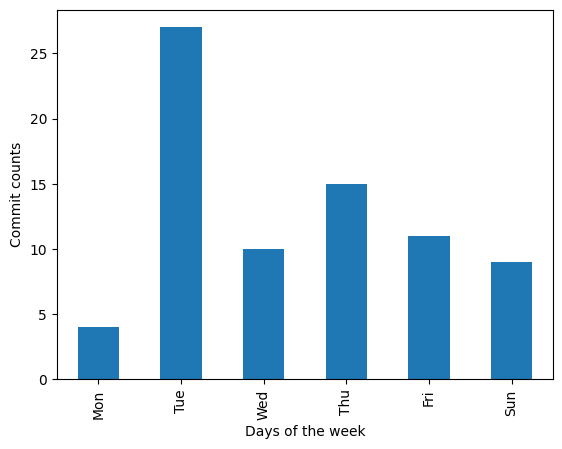

In [59]:
ax = sorted_day_counts.plot.bar()
ax.set_ylabel("Commit counts")
ax.set_xlabel("Days of the week")

#### Find all commit authors names.

In [60]:
authors = re.findall(r"Author:\s+(.+?)\s*<", git_log_output)
authors[0]

'gsingh58'

#### `git log` from projects repo

In [61]:
git_log_output = str(check_output(["git", "log"], cwd="../../projects-and-labs"), encoding="utf-8")
print(git_log_output[:1000])

commit 129a4745b416e3f0be08795dca69d02d528fe893
Author: JINLANG WANG <jwang2775@wisc.edu>
Date:   Mon Mar 11 10:37:16 2024 -0500

    Update file README.md

commit 413d84dceb0f48e111b25d9f7765513181feb6d6
Author: JINLANG WANG <jwang2775@wisc.edu>
Date:   Sat Mar 9 18:46:18 2024 -0600

    Update 2 files
    
    - /Labs/Lab10/README
    - /Labs/Lab10/README.md

commit bd2acf092cfeacdc994dac733300ab61a3373b26
Author: JINLANG WANG <jwang2775@wisc.edu>
Date:   Sat Mar 9 18:45:42 2024 -0600

    lab10

commit f84c2a89a44d374da385bb499738ec82b12b7965
Author: JINLANG WANG <jwang2775@wisc.edu>
Date:   Sat Mar 9 18:42:28 2024 -0600

    Update file EDGAR.md

commit 11b505faae9964182b99288210f54bae5ce3e211
Author: JINLANG WANG <jwang2775@wisc.edu>
Date:   Sat Mar 9 18:41:35 2024 -0600

    Update file README.md

commit 5f35a23cf70d24e627fef5fd89c0711cb144dbc4
Author: JINLANG WANG <jwang2775@wisc.edu>
Date:   Sat Mar 9 18:41:06 2024 -0600

    lab9

commit d481d4de35443a07812af9216d6883300207ae6

In [62]:
re.findall(r".*[pP][1-6].*", git_log_output)

['    P4 pipeline update',
 '    P4 released',
 '    fixing pipeline and adding backup mp3 tester file to ease confusion',
 '    mp3 install help',
 '    pipeline update for MP3',
 '    p3 pipeline changes',
 '    P4 pipeline setup',
 '    updating MP3 tester.py and MP3 pipeline',
 '    P3 released',
 '    P3 released',
 '    P2 key updated',
 '    MP2 Update/Fix to the tester',
 '    MP2 key fix + readme update',
 '    mp1 readme updated',
 '    P2 Release',
 '    gitlab tutorial + mp1 release',
 '    initial commit (P1)']

### Emails example

In [63]:
s = """
Gurmail [Instructor] - gsingh58(AT) cs.wisc.edu
Jinlang [Head TA] - jwang2775 (AT) wisc.edu
Elliot [TA] - eepickens (AT) cs.wisc.edu
Alex [TA] - aclinton (AT) wisc.edu
Bowman [TA] - bnbrown3 (AT) wisc.edu
Hafeez [TA] - aneesali (AT) wisc.edu
William [TA] - wycong (AT) wisc.edu
Someone [PM] - someone@wisc.edu
"""
print(s)


Gurmail [Instructor] - gsingh58(AT) cs.wisc.edu
Jinlang [Head TA] - jwang2775 (AT) wisc.edu
Elliot [TA] - eepickens (AT) cs.wisc.edu
Alex [TA] - aclinton (AT) wisc.edu
Bowman [TA] - bnbrown3 (AT) wisc.edu
Hafeez [TA] - aneesali (AT) wisc.edu
William [TA] - wycong (AT) wisc.edu
Someone [PM] - someone@wisc.edu



In [64]:
name = r"\w+"
at = r"@|([\(\[]?[Aa][Tt][\)\]]?)"
domain = r"\w+\.(\w+\.)?(edu|com|org|net|io|gov)"

full_regex = f"(({name})\s*({at})\s*({domain}))"

re.findall(full_regex, s)

[('gsingh58(AT) cs.wisc.edu',
  'gsingh58',
  '(AT)',
  '(AT)',
  'cs.wisc.edu',
  'wisc.',
  'edu'),
 ('jwang2775 (AT) wisc.edu',
  'jwang2775',
  '(AT)',
  '(AT)',
  'wisc.edu',
  '',
  'edu'),
 ('eepickens (AT) cs.wisc.edu',
  'eepickens',
  '(AT)',
  '(AT)',
  'cs.wisc.edu',
  'wisc.',
  'edu'),
 ('aclinton (AT) wisc.edu', 'aclinton', '(AT)', '(AT)', 'wisc.edu', '', 'edu'),
 ('bnbrown3 (AT) wisc.edu', 'bnbrown3', '(AT)', '(AT)', 'wisc.edu', '', 'edu'),
 ('aneesali (AT) wisc.edu', 'aneesali', '(AT)', '(AT)', 'wisc.edu', '', 'edu'),
 ('wycong (AT) wisc.edu', 'wycong', '(AT)', '(AT)', 'wisc.edu', '', 'edu'),
 ('someone@wisc.edu', 'someone', '@', '', 'wisc.edu', '', 'edu')]

In [65]:
print("REGEX:", full_regex)
for match in re.findall(full_regex, s):
    print(match[1] + "@" + match[4])

REGEX: ((\w+)\s*(@|([\(\[]?[Aa][Tt][\)\]]?))\s*(\w+\.(\w+\.)?(edu|com|org|net|io|gov)))
gsingh58@cs.wisc.edu
jwang2775@wisc.edu
eepickens@cs.wisc.edu
aclinton@wisc.edu
bnbrown3@wisc.edu
aneesali@wisc.edu
wycong@wisc.edu
someone@wisc.edu


### Self-practice

Q1: Which regex will NOT match "123"
1. r"\d\d\d"
2. r"\d{3}"
3. r"\D\D\D"
4. r"..."

Q2: What will r"^A" match?
1. "A"
2. "^A"
3. "BA"
4. "B"
5. "BB"

Q3: Which one can match "HH"?
1. r"HA+H"
2. r"HA+?H"
3. r"H(A+)?H"

Q4: Which string(s) will match r"^(ha)*$"
1. ""
2. "hahah"
3. "that"
4. "HAHA"

Q5: What is the type of the following?re.findall(r"(\d) (\w+)", some_str)[0]
1. list
2. tuple
3. string

Q6: What will it do?
```python
re.sub(r"(\d{3})-(\d{3}-\d{4})",
       r"(\g<1>) \g<2>",
       "608-123-4567")
```

The answers of these questions can be found in self_practice.ipynb. You may want to try to answer these questions yourself and then verify your answers.